# 1. Hand-crafted features

In this notebook we are going to look for the lost easter eggs using hand-crafted features. This will give a good understanding of image basics, and illustrates how computers handle and represent visual data.

Check OpenCV version to test if everyhting is setup correctly.

In [ ]:
import cv2
print(cv2.__version__)

## Easter egg detection with OpenCV

In this notebook, you'll learn to use OpenCV's standard functions to detect (easter) eggs.

🕒 Estimated time: 30 minutes

Skills you'll practice:
- Using cv2.cvtColor to work with HSV color space
- Creating binary masks with cv2.inRange for color filtering
- Finding and analyzing contours with cv2.findContours
- Fitting ellipses and filtering by shape area
- **Bonus:** Detecting multiple egg colors and labeling objects

**Documentation:** [OpenCV-docs](https://docs.opencv.org/4.11.0/d1/dfb/intro.html)

### Setup helper funcion (Update: will load utils instead)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Helper to show BGR image in correct color
def show_img(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to data
data_path = Path("./images/eggs/positives/")

### Load & Display Image

**Exercise:** open an image.

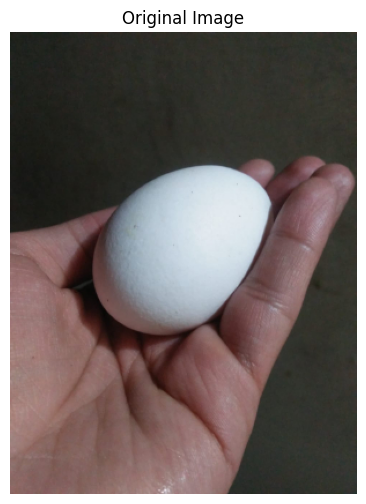

In [2]:
# Change image filename to one you want to try
img = cv2.imread(str(data_path / "not_damaged_1.jpg"))

if img is None:
    print("Image not found. Make sure your image file is in the data folder.")
else:
    show_img(img, title="Original Image")

### Creating a mask

**Exercise:** show previous image but then in HSV color space.

In [ ]:
# Show the image in this code block

#### HSV colorspace

**Exercise:** Find the correct HSV values for making a mask of an egg and write these down (for next exercise).

In [3]:
def nothing(x):
    pass

# Load image
img = cv2.imread("./images/eggs/positives/not_damaged_1.jpg")
img = cv2.resize(img, (600, 400))

# Create window and trackbars
cv2.namedWindow("HSV Tuner")
cv2.createTrackbar("H Low", "HSV Tuner", 0, 179, nothing)
cv2.createTrackbar("H High", "HSV Tuner", 179, 179, nothing)
cv2.createTrackbar("S Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("S High", "HSV Tuner", 255, 255, nothing)
cv2.createTrackbar("V Low", "HSV Tuner", 0, 255, nothing)
cv2.createTrackbar("V High", "HSV Tuner", 255, 255, nothing)

while True:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    hL = cv2.getTrackbarPos("H Low", "HSV Tuner")
    hH = cv2.getTrackbarPos("H High", "HSV Tuner")
    sL = cv2.getTrackbarPos("S Low", "HSV Tuner")
    sH = cv2.getTrackbarPos("S High", "HSV Tuner")
    vL = cv2.getTrackbarPos("V Low", "HSV Tuner")
    vH = cv2.getTrackbarPos("V High", "HSV Tuner")
    
    lower = np.array([hL, sL, vL])
    upper = np.array([hH, sH, vH])
    
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(img, img, mask=mask)

    stacked = np.hstack((img, result))
    cv2.imshow("HSV Tuner", stacked)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2564: error: (-27:Null pointer) NULL window: 'HSV Tuner' in function 'cvGetTrackbarPos'


**Exercise** Apply your mask on another egg image and see what happens, use the empty code block below.

In [ ]:
## Apply mask to new egg image

#### BGR colorspace
**If your happy with your mask then skip this step otherwise you can try to create a better mask using BRG instead of HSV**

In [7]:
import cv2
import numpy as np

def nothing(x):
    pass

# Load image
img = cv2.imread("./images/eggs/positives/not_damaged_1.jpg")
img = cv2.resize(img, (600, 400))

# Create window and trackbars
cv2.namedWindow("BGR Tuner")
cv2.createTrackbar("B Low", "BGR Tuner", 0, 255, nothing)
cv2.createTrackbar("B High", "BGR Tuner", 255, 255, nothing)
cv2.createTrackbar("G Low", "BGR Tuner", 0, 255, nothing)
cv2.createTrackbar("G High", "BGR Tuner", 255, 255, nothing)
cv2.createTrackbar("R Low", "BGR Tuner", 0, 255, nothing)
cv2.createTrackbar("R High", "BGR Tuner", 255, 255, nothing)

while True:
    # Get BGR range from trackbars
    bL = cv2.getTrackbarPos("B Low", "BGR Tuner")
    bH = cv2.getTrackbarPos("B High", "BGR Tuner")
    gL = cv2.getTrackbarPos("G Low", "BGR Tuner")
    gH = cv2.getTrackbarPos("G High", "BGR Tuner")
    rL = cv2.getTrackbarPos("R Low", "BGR Tuner")
    rH = cv2.getTrackbarPos("R High", "BGR Tuner")
    
    # Set the lower and upper bounds for BGR mask
    lower = np.array([bL, gL, rL])  # Lower bound
    upper = np.array([bH, gH, rH])  # Upper bound
    
    # Create mask using the BGR range
    mask = cv2.inRange(img, lower, upper)
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=mask)

    # Stack the original and result images for comparison
    stacked = np.hstack((img, result))
    
    # Show the result
    cv2.imshow("BGR Tuner", stacked)

    # Break the loop if the 'Esc' key is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2564: error: (-27:Null pointer) NULL window: 'BGR Tuner' in function 'cvGetTrackbarPos'


#### Plot mask

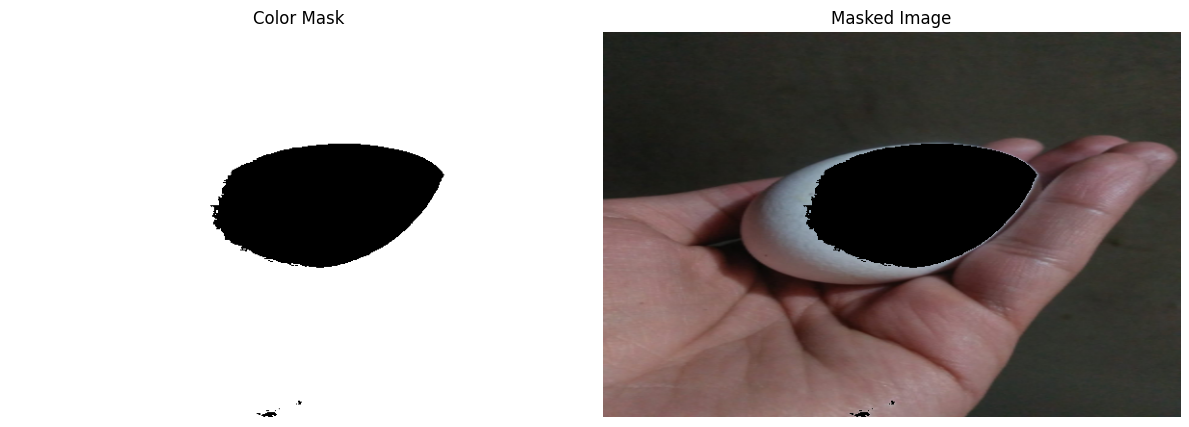

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("./images/eggs/positives/not_damaged_1.jpg")
img = cv2.resize(img, (600, 400))

# Convert image to HSV (hue-saturation-value) color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Tune these values for your specific egg color
lower = np.array([0, 0, 0])   # example: orange-ish
upper = np.array([179, 255, 179])

# Create color mask
mask = cv2.inRange(hsv, lower, upper)

# Apply mask to original image
masked = cv2.bitwise_and(img, img, mask=mask)

# Visualize mask + result
plt.figure(figsize=(12, 5))

# Show the color mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.title("Color Mask")
plt.axis('off')

# Show the masked image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Masked Image")
plt.axis('off')

plt.tight_layout()
plt.show()


#### Shape filtering

**Exercise:** Set the threshold in the code block below so only the contour of the egg remains. 

**NOTE** Your mask of the egg needs to be white and the background needs to be black, if this is not the case look up how you can invert the image

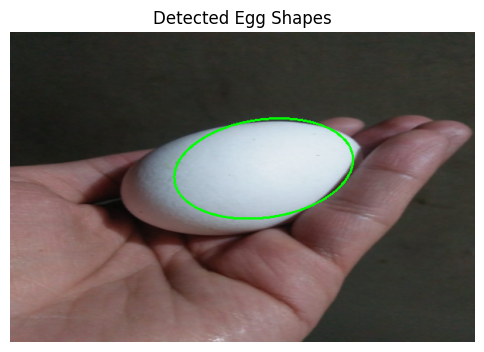

In [6]:
# Find contours in the mask
contours, _ = cv2.findContours(~mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area and draw ellipses
output = img.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:  # Tune area threshold
        # Fit ellipse if contour has enough points
        if len(cnt) >= 5:
            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(output, ellipse, (0, 255, 0), 2)

show_img(output, title="Detected Egg Shapes")

#### Detecting multiple eggs

**Exercise:** With the knowledge you have now try to do the following
- Try to detect multiple eggs (one or mutiple masks)
- Draw an ellipse on all eggs in the image and put a label next to it that says "Egg"